# Clase Supervised Classification ML

## Importar librerías

In [52]:
# Recuerda importar:
# 1. Las librerías típicas como pandas
# 2. Las que necesites para las transformaciones
# 3. Las que necesites para los modelos
# 4. Las que necesites para guardar y recuperar modelos

# Ves añadiéndolas conforme las necesites

# Tu código aquí debajo
import pandas as pd
import sklearn as sk
from joblib import dump 
from joblib import load

## Importar los datos

In [53]:
# Tu código aquí debajo
df = pd.read_excel('diabetes_clean.xlsx')
df2 = df.copy()

## Detectar y tratar duplicados

In [54]:
# Tu código aquí debajo

df.duplicated().sum()

0

## Detectar y tratar valores nulos

In [55]:
# Tu código aquí debajo

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Satisfaction                0
Job                         0
Outcome                     0
dtype: int64

## Detectar y tratar valores atípicos (ouliers)

In [56]:
# Tu código aquí debajo
def outliers(d,v):
    import numpy as np
    q3=np.quantile(d[v],0.75)
    q1=np.quantile(d[v],0.25)
    ric=q3-q1
    df_outliers=d.loc[(d[v]>=q3+1.5*ric) | (d[v]<=q1-1.5*ric), : ]
    df_limpio= d.loc[(d[v]<q3+1.5*ric) & (d[v]>q1-1.5*ric), : ]
    return df_outliers,df_limpio

In [57]:
num = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
for i in num:
    a,b=outliers(df2,i)
    df2 = b

In [58]:
df2.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job,Outcome
34,7,106,92,18,0,22.7,235.0,48,Extremely satisfied,Legislator,0
235,0,107,62,30,74,36.6,757.0,25,Extremely satisfied,High School Teacher,1
132,2,100,64,23,0,29.7,368.0,21,Extremely satisfied,Market Research Analyst,0
19,7,147,76,0,0,39.4,257.0,43,Extremely satisfied,Human Resources,1
121,2,90,70,17,0,27.3,85.0,22,Extremely unsatisfied,Database Administrator,0


# Preparamos los datos



## Transformar variables ordinales en numéricas

Como vemos tenemos la variable Satisfaction que es una variable ordinal y podemos suponer que el impacto que podrá tener sobre la variable a predecir (diabetes si/no) permanecerá constante al pasar de una categoría a la siguiente. por eso, la codificaremos como variable ordinal

In [59]:
df2["Satisfaction"].value_counts()

Unsatisfied              175
Extremely unsatisfied    149
Extremely satisfied      141
Satisfied                105
Name: Satisfaction, dtype: int64

In [60]:
# Creamos el objeto que realizará la transformación dándole el orden en una lista con doble corchete
# Tu código aquí debajo

# Particularizamos el codificador en nuestros datos
# Tu código

# Aplicamos el codificador ya particularizado a nuestros datos y lo guardamos machacando la misma variable
# Tu código aquí debajo

# Imprime la dimensión de los datos y un sample
# Tu código aquí debajo

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories = [['Extremely unsatisfied','Unsatisfied','Satisfied','Extremely satisfied']],dtype= 'int')

df2['Satisfaction'] = ordinal_encoder.fit_transform(df2[["Satisfaction"]])


In [61]:
# Guardamos el codificador
# Tu código aquí debajo

## Transformar variables nominales en numéricas

Como vemos tenemos la variable Job que es una variable nominal (sin orden) y debenmos codificarla mediante el One-Hot encoder

In [62]:
# Tu código
from sklearn.preprocessing import OneHotEncoder

OneHot = OneHotEncoder()
aux = OneHot.fit_transform(df2[['Job']])

df2_one_hot = pd.DataFrame(aux.toarray(),columns=OneHot.get_feature_names_out(['Job']))
df2.reset_index(drop=True,inplace=True)
df2_one_hot.reset_index(drop=True,inplace=True)
df2=pd.concat([df2,df2_one_hot],axis=1)
df2.drop(columns='Job',inplace=True)
df2.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Outcome,Job_Database Administrator,Job_Epidemiologist,Job_Financial Analyst,Job_Firefighter,Job_High School Teacher,Job_Human Resources,Job_Legislator,Job_Market Research Analyst,Job_Physicians,Job_Statistician
109,10,108,66,0,0,32.4,272.0,42,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
228,0,137,68,14,148,24.8,143.0,21,3,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
558,3,108,62,24,0,26.0,223.0,25,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
523,5,126,78,27,22,29.6,439.0,40,2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
387,9,130,70,0,0,34.2,652.0,45,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
# Guardamos el codificador

# REGRESIÓN LOGÍSTICA. Usamos la estandarización

## 0. Separar la variable a predecir y las predictoras

In [64]:
# Tu código aquí debajo
X = df2.drop(columns=["Outcome"],inplace=False)
y = df2["Outcome"]

In [65]:
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo

X.shape

(570, 19)

## 1. Split. Separar los datos en conjunto de entrenamiento (train) y conjunto de evaluación o test(test)

In [66]:
# Tu código aquí debajo

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(456, 19)
(114, 19)
(456,)
(114,)


## 2. Estandarización controlada.

* Fit en el train
* Transform en el train
* Transform en el test

In [68]:
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)



In [69]:
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo

print(X_train_std.shape)
print(X_test_std.shape)

(456, 19)
(114, 19)


## 3. Fit. Entrenar el modelo

* Creamos el modelo
* Entrenamos el modelo sobre los datos de train y obtenemos el modelo entrenado

In [70]:
# Cargamos el modelo y lo creamos
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(X_train_std,y_train)

# Ahora LR ya es un modelo que se puede entrenar (fit)

LogisticRegression()

In [71]:
# Entrenamos el modelo dtree
# Imprime la dimensión de los datos que vayas creando
# Tu código aquí debajo

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train_std,y_train)

# Ahora LR es un modelo entrenado capaz de hacer predicciones

DecisionTreeClassifier()

## 4. Evaluar el Modelo

* Hacemos predicciones sobre el conjunto de test
* Comparamos esas predicciones con los valores reales. Calculamos la precisión (accuracy)

In [72]:
# Hacemos predicciones sobre el conjunto de test y la guardamos en predictions
# Tu código aquí debajo

predicciones = LR.predict(X_test_std)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicciones)

0.7982456140350878

<AxesSubplot:>

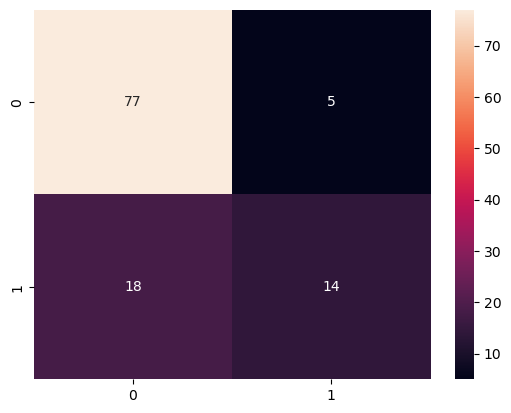

In [73]:
# Calculamos la matriz de confusión. Si quieres es absoluto y en porcentaje
# Tu código aquí debajo

from sklearn.metrics import confusion_matrix
from seaborn import heatmap

confusion_matrix(y_test,predicciones)

heatmap(confusion_matrix(y_test,predicciones),annot=True)

Completa esta información a partir de la matriz de confusión:

* Hay ?? Verdaderos positivos
* Hay ?? Falsos negativos
* Hay ?? Falsos positivos
* Hay ?? Verdaderos positivos

Conceptos importantes en modelos supervisados de clasificación

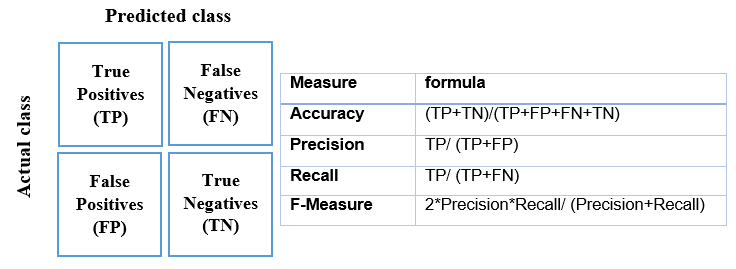

In [74]:
# Specificity = TN / TN + FP
# https://iq.opengenus.org/precision-recall-sensitivity-specificity/#google_vignette

In [75]:
# Calculamos la Accuracy
# Tu código aquí debajo
from sklearn.metrics import accuracy_score
predictions = LR.predict(X_test_std)
accuracy_score(y_test, predictions).round(3)


0.798

In [76]:
# Calculamos la F-Measure
# Tu código aquí debajo
from sklearn.metrics import f1_score

predictions = LR.predict(X_test_std)
f1_score(y_test, predictions).round(3)

0.549

In [77]:
# Calculamos la Recall
# Tu código aquí debajo
from sklearn.metrics import recall_score

predictions = LR.predict(X_test_std)
recall_score(y_test, predictions).round(3)


0.438

In [78]:
# Calculamos la Precision
# Tu código aquí debajo
from sklearn.metrics import precision_score

predictions = LR.predict(X_test_std)
precision_score(y_test, predictions).round(3)

0.737

## 5. Creamos el modelo final

* Creamos una nueva estandarización con todos los datos
* Creamos el modelo con todos los datos
* Guardamos el estandarizador y el modelo

In [94]:
# Creamos una nueva estandarización con todos los datos
# Tu código aquí debajo

estandarizer_final = StandardScaler()
X_final = estandarizer_final.fit_transform(X)

LR_final = LogisticRegression()
LR_final.fit(X_final, y)

# Guardamos el estandarizador y el modelo

dump(estandarizer_final,'standard_final.std')
dump(OneHot, 'one_hot_final.std')
dump(ordinal_encoder, "ordinal_final.std")
dump(LR_final, 'LR_final.std')

#Creamos /fitamos el modelo con todos los datos
# Tu código aquí debajo

['LR_final.std']

## 6. Usamos el modelo

* Volvemos a cargar el estandarizador y el modelo simulando que lo recuperamos
* Creamos los nuevos datos sobre los que queremos usar / hacer predicciones
* Los estandarizamos con el estandarizador recuperado
* Predecimos la variable 'Purchased' para esos nuevos datos

In [108]:
# Recuperamos los codificadores, el estandarizador y el modelo
# Tu código aquí debajo

model = load('LR_final.std')
ohf = load('one_hot_final.std')
odf = load('ordinal_final.std')
stf = load('standard_final.std')

In [109]:
ohf

OneHotEncoder()

In [110]:
# Tomamos los nuevos datos "diabetes_new_data.xlsx"
# Tu código aquí debajo

new_data = pd.read_excel('diabetes_new_data.xlsx')
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job
0,10,100,72,35,0,33.6,627,50,Extremely unsatisfied,Human Resources
1,1,85,70,29,0,26.6,351,31,Unsatisfied,Financial Analyst
2,0,183,64,5,10,30.0,672,32,Satisfied,High School Teacher
3,3,89,66,23,94,28.1,167,21,Extremely satisfied,Legislator


In [111]:
# Aplicamos las codificaciones a nuestros nuevos datos

a = ohf.transform(new_data[["Job"]])

one_hot_new = pd.DataFrame(a.toarray(),columns=ohf.get_feature_names_out(['Job']))
new_data.reset_index(drop=True,inplace=True)
one_hot_new.reset_index(drop=True,inplace=True)
new_data=pd.concat([new_data,one_hot_new],axis=1)
new_data.drop(columns='Job',inplace=True)

In [112]:
# Ordinal

new_data["Satisfaction"] = odf.transform(new_data[["Satisfaction"]])

In [113]:
# Estandarizamos los nuevos datos
# Tu código aquí debajo

new_data_std = stf.transform(new_data)

In [114]:
# Predecimos la variable 'Outcome' para esos valores y los mostramos.
# Tu código aquí debajo

new_data["Predictions"] = model.predict(new_data_std)

In [117]:
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job_Database Administrator,Job_Epidemiologist,Job_Financial Analyst,Job_Firefighter,Job_High School Teacher,Job_Human Resources,Job_Legislator,Job_Market Research Analyst,Job_Physicians,Job_Statistician,Predictions
0,10,100,72,35,0,33.6,627,50,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,1,85,70,29,0,26.6,351,31,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,183,64,5,10,30.0,672,32,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,3,89,66,23,94,28.1,167,21,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [116]:
new_data.to_excel("Resultados_Predicciones_diabetes.xlsx")